In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import vstack
from numpy import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from tqdm import tqdm
from torch.nn import Module, Linear, ReLU
from torch.nn.init import xavier_uniform_

In [3]:
# import all stock prices 
df = pd.read_csv("C:/Users/yasmi/Downloads/archive/prices.csv", index_col = 0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 00:00:00 to 2016-12-30 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [9]:
# Vérifier les données manquantes
print(df.isnull().sum())

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


In [11]:
# Statistiques descriptives
print(df.describe())

                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  


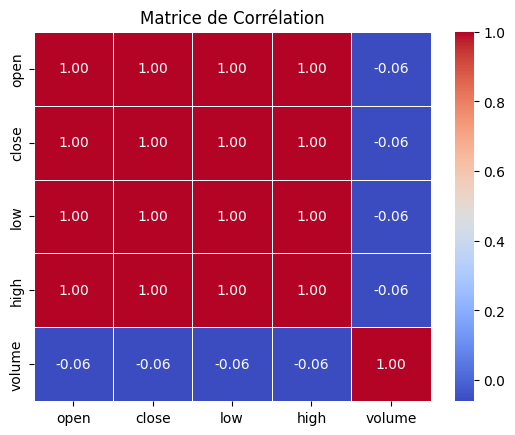

In [14]:
import seaborn as sns
# Visualisation des données
# Calculer la matrice de corrélation
corr_matrix = df[['open', 'close', 'low', 'high', 'volume']].corr()

# Tracer la matrice de corrélation en utilisant un heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

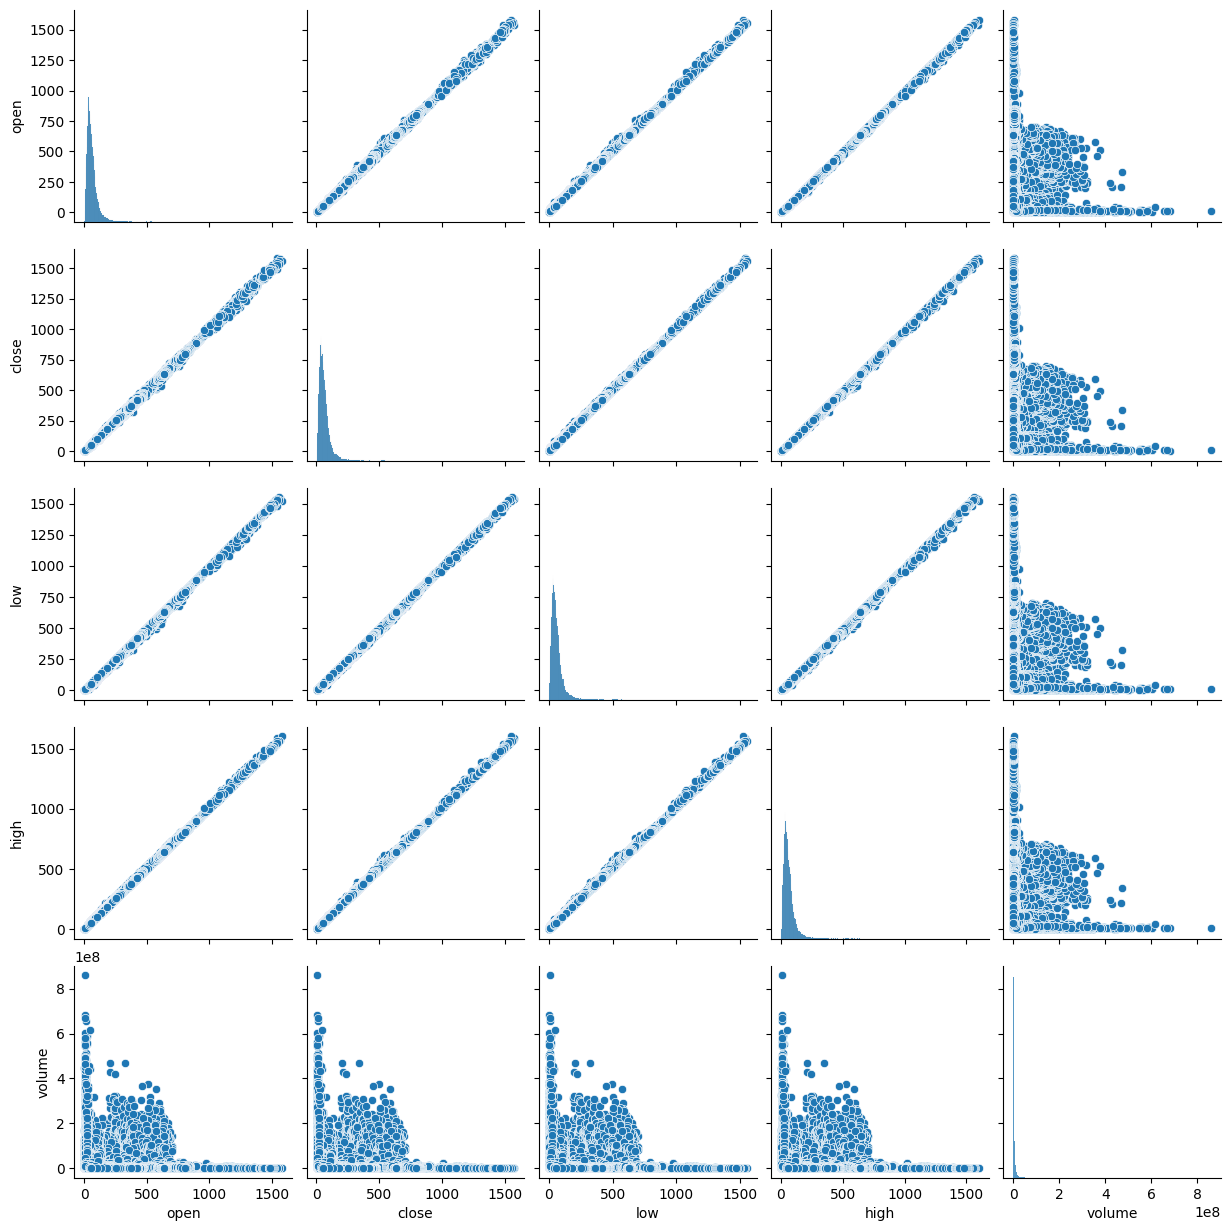

In [18]:
# Visualisation des données
sns.pairplot(df[['open', 'close', 'low', 'high', 'volume']])
plt.show()

In [19]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim

In [21]:
# Normaliser les données
scaler = StandardScaler()
df[['open', 'close', 'low', 'high', 'volume']] = scaler.fit_transform(df[['open', 'close', 'low', 'high', 'volume']])

# Diviser les données en ensembles d'entraînement et de test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Créer des tenseurs PyTorch
X_train = torch.tensor(train_data[['open', 'close', 'low', 'high', 'volume']].values, dtype=torch.float32)
y_train = torch.tensor(train_data['close'].values, dtype=torch.float32)

# Définir une classe de modèle
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialiser le modèle, la fonction de perte et l'optimiseur
model = RegressionModel(input_size=5)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entraîner le modèle
num_epochs = 100
loss_values = []

for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [10/100], Loss: 0.08033765107393265
Epoch [20/100], Loss: 0.0227408055216074
Epoch [30/100], Loss: 0.015039995312690735
Epoch [40/100], Loss: 0.012654188089072704
Epoch [50/100], Loss: 0.01133266743272543
Epoch [60/100], Loss: 0.01032791193574667
Epoch [70/100], Loss: 0.009480532258749008
Epoch [80/100], Loss: 0.00874379277229309
Epoch [90/100], Loss: 0.00809579249471426
Epoch [100/100], Loss: 0.007522199768573046


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Charger les données
data = pd.read_csv('C:/Users/yasmi/Downloads/archive/prices.csv')

# Normaliser les données
scaler = StandardScaler()
data[['open', 'close', 'low', 'high', 'volume']] = scaler.fit_transform(data[['open', 'close', 'low', 'high', 'volume']])

# Diviser les données en ensembles d'entraînement et de test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Créer des tenseurs PyTorch pour les données d'entraînement
X_train = torch.tensor(train_data[['open', 'close', 'low', 'high', 'volume']].values, dtype=torch.float32)
y_train = torch.tensor(train_data['close'].values, dtype=torch.float32)

# Créer une classe de modèle
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Créer une classe spéciale pour encapsuler le modèle PyTorch
class PyTorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_size=5, lr=0.01, epochs=10):
        self.model = RegressionModel(input_size)
        self.lr = lr
        self.epochs = epochs
        self.input_size = input_size

    def fit(self, X, y):
        criterion = nn.MSELoss()  # Définir la fonction de perte ici
        optimizer = optim.SGD(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            outputs = self.model(X)
            loss = criterion(outputs, y.view(-1, 1))
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        return self

    def predict(self, X):
        with torch.no_grad():
            return self.model(X).numpy()

# Utiliser GridSearchCV avec moins d'epochs
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'epochs': [5, 10, 15],
}

# Utiliser GridSearchCV
model_sklearn = PyTorchRegressor()
grid_search = GridSearchCV(model_sklearn, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Visualisation des courbes d'apprentissage
X_test = torch.tensor(test_data[['open', 'close', 'low', 'high', 'volume']].values, dtype=torch.float32)
y_test = torch.tensor(test_data['close'].values, dtype=torch.float32)

model = grid_search.best_estimator_
model.epochs = 100  # Utilisez un nombre plus grand d'epochs pour la visualisation finale

# Entraîner le modèle avec enregistrement de la perte et de la précision à chaque epoch
train_losses, test_losses = [], []
criterion = nn.MSELoss()  # Définir la fonction de perte ici aussi
for epoch in range(model.epochs):
    model.fit(X_train, y_train)
    
    # Calculer la perte sur les données d'entraînement
    model.model.eval()
    train_outputs = model.predict(X_train)
    train_loss = criterion(torch.tensor(train_outputs), y_train.view(-1, 1))
    train_losses.append(train_loss.item())

    # Calculer la perte sur les données de test
    model.model.eval()
    test_outputs = model.predict(X_test)
    test_loss = criterion(torch.tensor(test_outputs), y_test.view(-1, 1))
    test_losses.append(test_loss.item())

# Visualisation des courbes d'apprentissage
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Courbe de Perte')
plt.legend()

plt.tight_layout()
plt.show()


Meilleurs paramètres: {'epochs': 15, 'lr': 0.1}


In [4]:
# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])


number of different stocks:  501
['ICE', 'PYPL', 'K', 'PPG', 'CCI', 'AWK', 'NVDA', 'SRE', 'NKE', 'HAR']


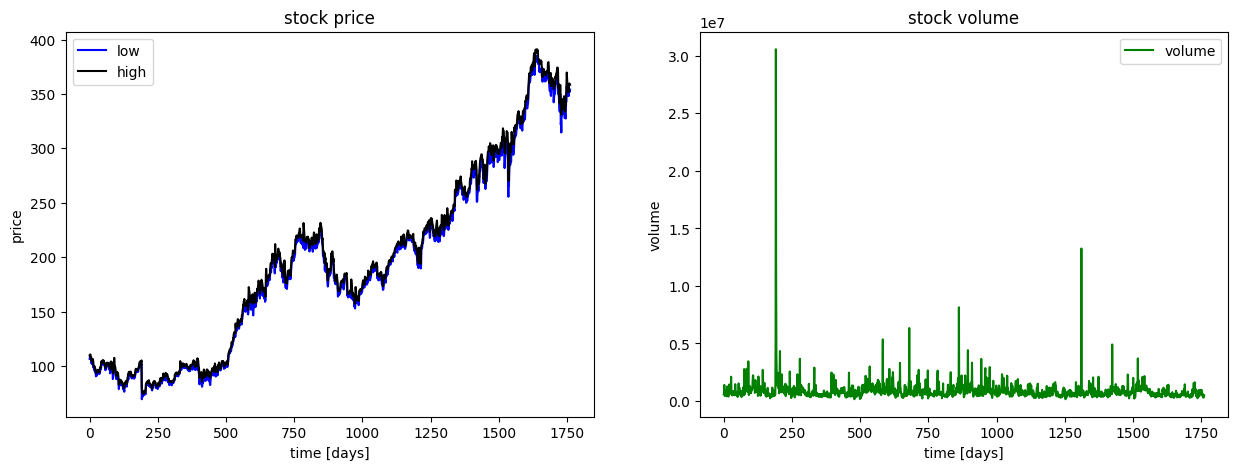

In [5]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='green', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')
#plt.show()

In [6]:
# evaluate the model
import numpy as np 
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # calculate absolute mean squared error
        abs_mse = np.mean(np.abs(yhat - actual)**2)
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    return abs_mse

In [7]:
import torch
from torch.nn import Module, Linear, ReLU, MSELoss
from torch.nn.init import xavier_uniform_
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from pandas import read_csv
from numpy import vstack
import matplotlib.pyplot as plt

# Model definition
class MLP(Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = ReLU()
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = ReLU()
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        return X

# Dataset class
class CSVDataset(Dataset):
    def __init__(self, df, symbol):
        df_stock = df[df['symbol'] == symbol]
        self.X = df_stock.values[:, 1:].astype('float32')  # Exclude 'symbol' column
        self.y = df_stock['close'].values.astype('float32').reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def get_splits(self, test_size=0.2):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=42)
        return (
            DataLoader(list(zip(X_train, y_train)), batch_size=32, shuffle=True),
            DataLoader(list(zip(X_test, y_test)), batch_size=1024, shuffle=False)
        )

# Training function
# Training function with loss and accuracy tracking
def train_model(train_dl, test_dl, model, optimizer, criterion):
    size = len(train_dl.dataset)
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in tqdm(range(100), desc='Training Epochs'):
        model.train()
        train_loss, correct_train = 0, 0
        for batch, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * len(inputs)
            correct_train += ((yhat > 0.5) == targets).sum().item()

        train_losses.append(train_loss / size)
        train_accuracies.append(correct_train / size)

        # Evaluate on the test set
        model.eval()
        test_loss, correct_test = 0, 0
        with torch.no_grad():
            for inputs, targets in test_dl:
                yhat = model(inputs)
                loss = criterion(yhat, targets)

                test_loss += loss.item() * len(inputs)
                correct_test += ((yhat > 0.5) == targets).sum().item()

        test_losses.append(test_loss / len(test_dl.dataset))
        test_accuracies.append(correct_test / len(test_dl.dataset))

    return train_losses, test_losses, train_accuracies, test_accuracies

# Evaluation function
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy().reshape(-1, 1)
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    return predictions, actuals

# Calculate accuracy
def calculate_accuracy(predictions, actuals, threshold=0.5):
    binary_predictions = (predictions > threshold).astype(int)
    binary_actuals = (actuals > threshold).astype(int)
    accuracy = (binary_predictions == binary_actuals).mean()
    return accuracy

# Load the dataset
symbol_of_interest = 'ORCL'
dataset = CSVDataset(df, symbol_of_interest)
train_dl, test_dl = dataset.get_splits()

# Model, optimizer, and criterion
model = MLP(n_inputs=dataset.X.shape[1])
optimizer = Adam(model.parameters(), lr=0.001)
criterion = MSELoss()

# Train the model
train_model(train_dl, model, optimizer, criterion)

# Evaluate the model
predictions, actuals = evaluate_model(test_dl, model)

# Print accuracy
accuracy = calculate_accuracy(predictions, actuals)
print(f"Accuracy on the test set: {accuracy:.2%}")


TypeError: train_model() missing 1 required positional argument: 'criterion'

Training Epochs: 100%|███████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.67it/s]


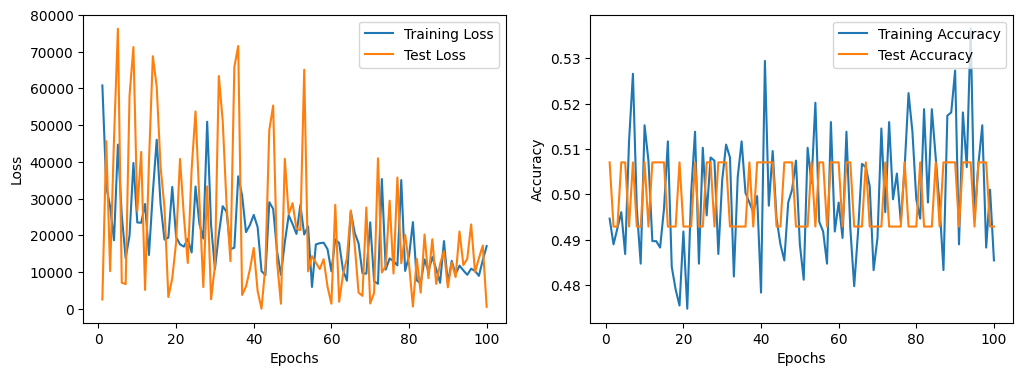

Accuracy on the test set: 49.29%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


C:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import torch
from torch.nn import Module, Linear, ReLU, BCEWithLogitsLoss
from torch.nn.init import xavier_uniform_
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model definition
class MLP(Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 64)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = ReLU()
        self.hidden2 = Linear(64, 32)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = ReLU()
        self.hidden3 = Linear(32, 1)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        return X

# Dataset class
class CSVDataset(Dataset):
    def __init__(self, df, symbol):
        df_stock = df[df['symbol'] == symbol]
        self.X = df_stock[['open', 'low', 'high', 'volume']].values.astype('float32')
        self.y = (df_stock['close'].pct_change() > 0).astype('float32').values.reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def get_splits(self, test_size=0.2):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=42)
        return (
            DataLoader(list(zip(X_train, y_train)), batch_size=32, shuffle=True),
            DataLoader(list(zip(X_test, y_test)), batch_size=1024, shuffle=False)
        )

# Training function with loss and accuracy tracking
def train_model(train_dl, test_dl, model, optimizer, criterion, device):
    size = len(train_dl.dataset)
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in tqdm(range(100), desc='Training Epochs'):
        model.train()
        train_loss, correct_train = 0, 0
        for inputs, targets in train_dl:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * len(inputs)
            correct_train += ((yhat > 0.5) == targets).sum().item()

        train_losses.append(train_loss / size)
        train_accuracies.append(correct_train / size)

        # Evaluate on the test set
        model.eval()
        test_loss, correct_test = 0, 0
        with torch.no_grad():
            for inputs, targets in test_dl:
                inputs, targets = inputs.to(device), targets.to(device)
                yhat = model(inputs)
                loss = criterion(yhat, targets)

                test_loss += loss.item() * len(inputs)
                correct_test += ((yhat > 0.5) == targets).sum().item()

        test_losses.append(test_loss / len(test_dl.dataset))
        test_accuracies.append(correct_test / len(test_dl.dataset))

    return train_losses, test_losses, train_accuracies, test_accuracies

# Load the dataset
symbol_of_interest = 'ORCL'
dataset = CSVDataset(df, symbol_of_interest)
train_dl, test_dl = dataset.get_splits()

# Model, optimizer, and criterion
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(n_inputs=dataset.X.shape[1]).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = BCEWithLogitsLoss()

# Train the model and get the loss and accuracy values
train_losses, test_losses, train_accuracies, test_accuracies = train_model(train_dl, test_dl, model, optimizer, criterion, device)

# Plot Loss / Epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy / Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluate additional metrics
predictions, actuals = evaluate_model(test_dl, model)
accuracy = accuracy_score(actuals, (predictions > 0.5).astype(int))
precision = precision_score(actuals, (predictions > 0.5).astype(int))
recall = recall_score(actuals, (predictions > 0.5).astype(int))
f1 = f1_score(actuals, (predictions > 0.5).astype(int))

print(f"Accuracy on the test set: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
